## Importing necessary libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

In [18]:
df = pd.read_csv("../data/data.csv")

In [19]:
df.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [20]:
df.to_csv("../data.csv")

## Data Preparation

In [21]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [22]:
df.set_index('DATE',inplace=True)

In [23]:
df.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


<AxesSubplot:xlabel='DATE'>

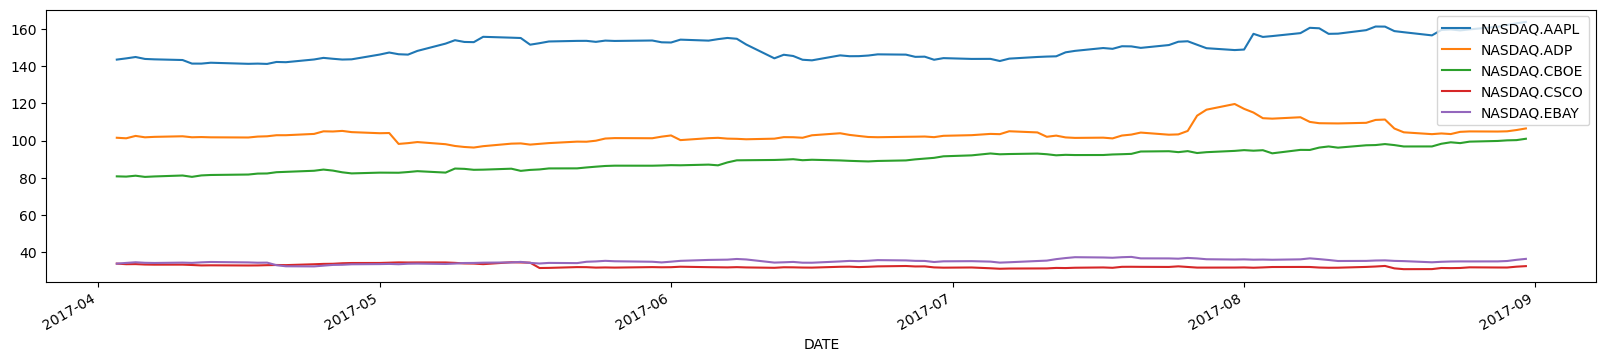

In [24]:
df.resample('B').mean().dropna().plot(figsize=(20,4))

In [25]:
df = df[['NASDAQ.EBAY']]

In [26]:
df

,NASDAQ.EBAY
DATE,
2017-04-03 13:30:00,33.3975
2017-04-03 13:31:00,33.3950
2017-04-03 13:32:00,33.4100
2017-04-03 13:33:00,33.3350
2017-04-03 13:34:00,33.4000
...,...
2017-08-31 19:56:00,36.1350
2017-08-31 19:57:00,36.1300
2017-08-31 19:58:00,36.1300


## Data Visualization

<AxesSubplot:xlabel='DATE'>

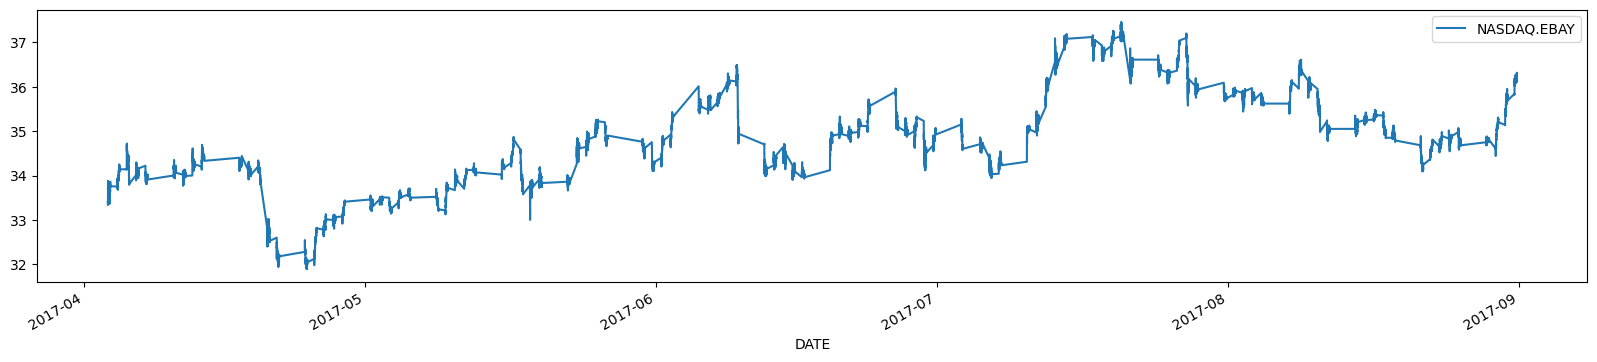

In [27]:
df.plot(figsize=(20,4))

In [28]:
df.index.month_name().unique()

Index(['April', 'May', 'June', 'July', 'August'], dtype='object', name='DATE')

In [29]:
df.index.day_name().unique()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], dtype='object', name='DATE')

            NASDAQ.EBAY
DATE                   
2017-04-03    33.583420
2017-04-04    33.971657
2017-04-05    34.318333
2017-04-06    34.029881
2017-04-07    33.943332
...                 ...
2017-08-25    34.774916
2017-08-28    34.795236
2017-08-29    35.000597
2017-08-30    35.639739
2017-08-31    36.152124

[109 rows x 1 columns]


<AxesSubplot:xlabel='DATE'>

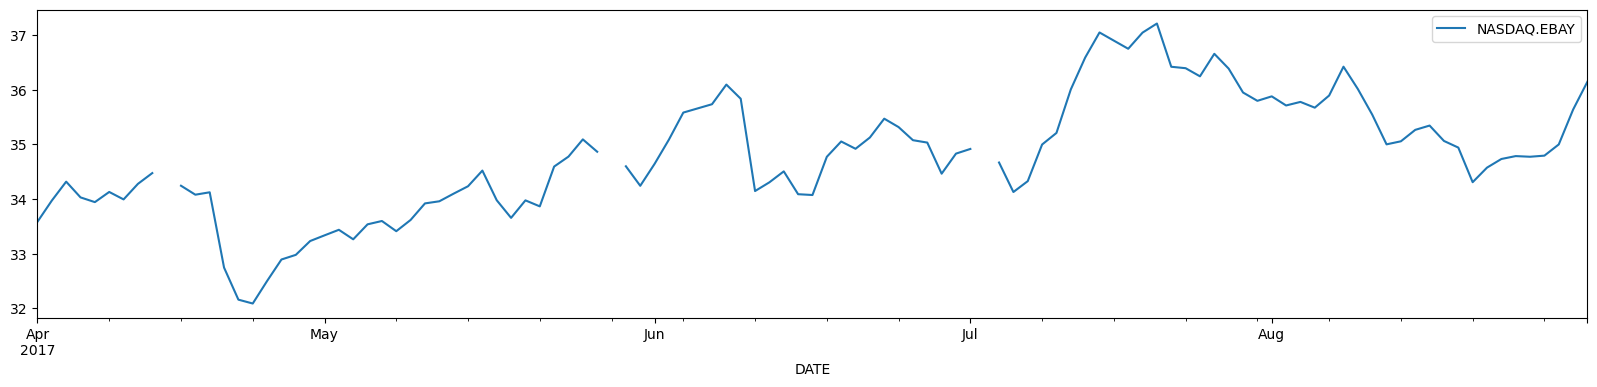

In [30]:
freq='B'
print(df.resample(freq).mean())
df.resample(freq).mean().plot(figsize=(20,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


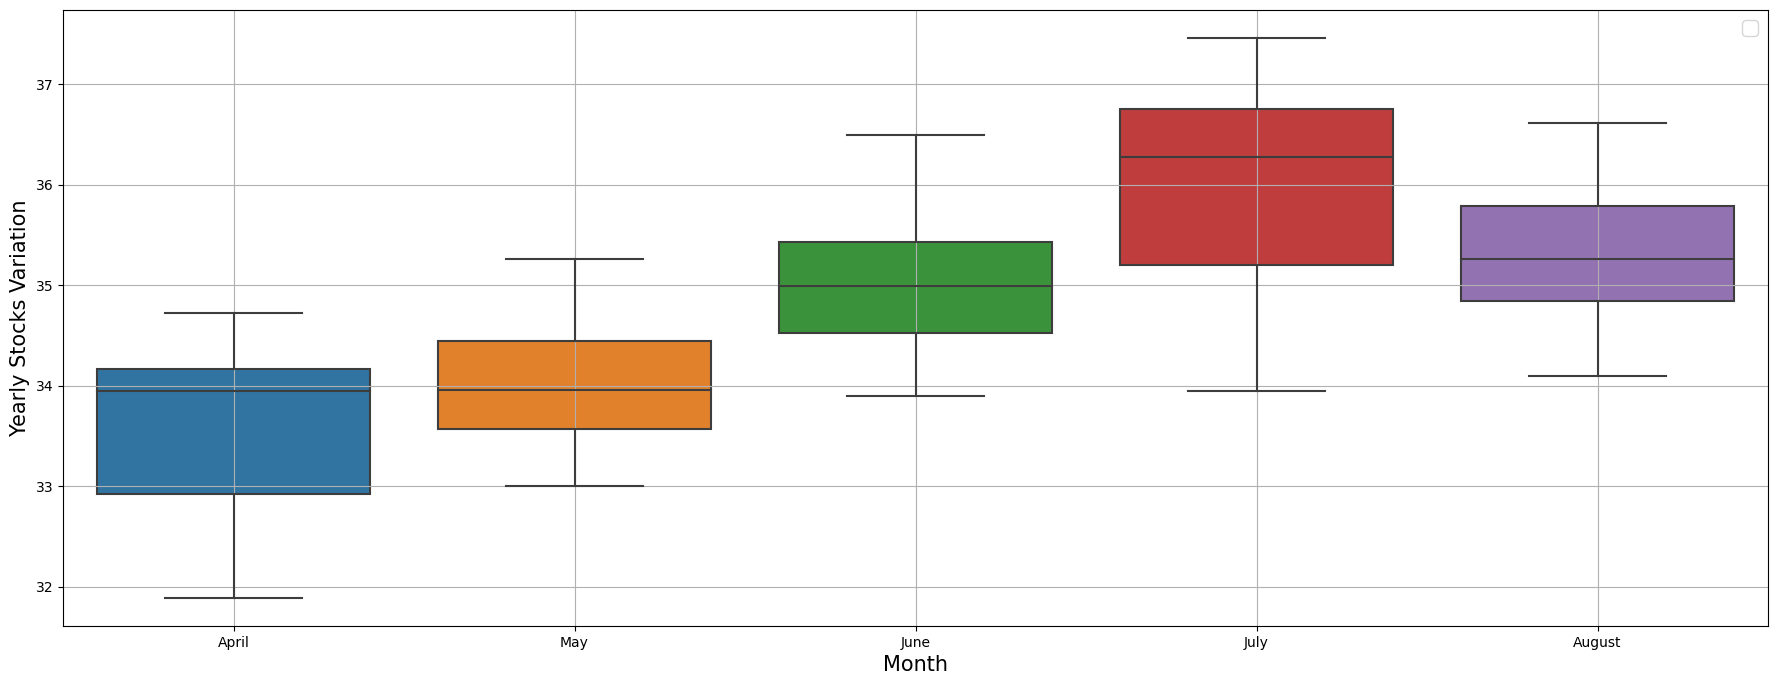

In [31]:
## Monthly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)

plt.grid()
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Stocks Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [32]:
data=df.resample(freq).mean()

In [33]:
data[data['NASDAQ.EBAY'].isnull()]

,NASDAQ.EBAY
DATE,
2017-04-14,NaN
2017-05-29,NaN
2017-07-04,NaN


<AxesSubplot:xlabel='DATE'>

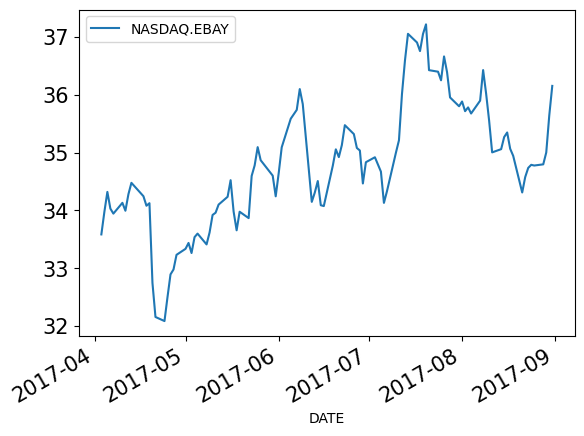

In [34]:
data=data.dropna()
data.plot()

## Decomposition

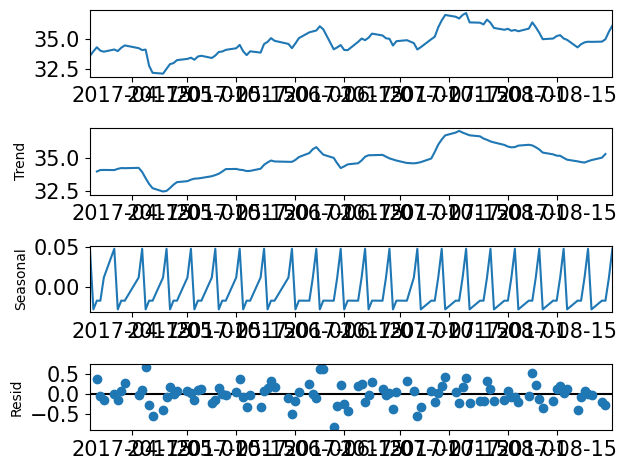

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,model='additive',period=5).plot()

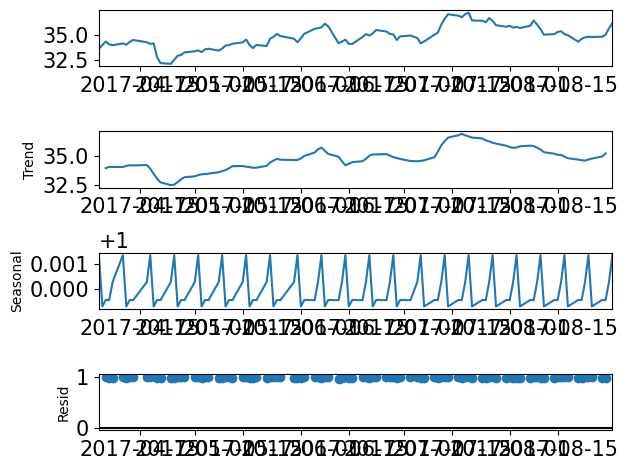

In [36]:
decomposition = seasonal_decompose(data,model='multiplicative',period=5)
decomposition.plot()
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

## Differencing

In [37]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['NASDAQ.EBAY'])

def adfuller_test(stock):
    result=adfuller(stock)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [38]:
adfuller_test(data['NASDAQ.EBAY'])

ADF Test Statistic : -2.1633253184648424
p-value : 0.21982439259080327
#Lags Used : 1
Number of Observations Used : 104
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [39]:
data['NASDAQ.EBAY First Difference']=data['NASDAQ.EBAY']-data['NASDAQ.EBAY'].shift(1)

In [40]:
adfuller_test(data['NASDAQ.EBAY First Difference'].dropna())

ADF Test Statistic : -7.240808918214542
p-value : 1.8865514677808884e-10
#Lags Used : 1
Number of Observations Used : 103
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## PLOT ACF and PACF

c:\Users\sriva\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


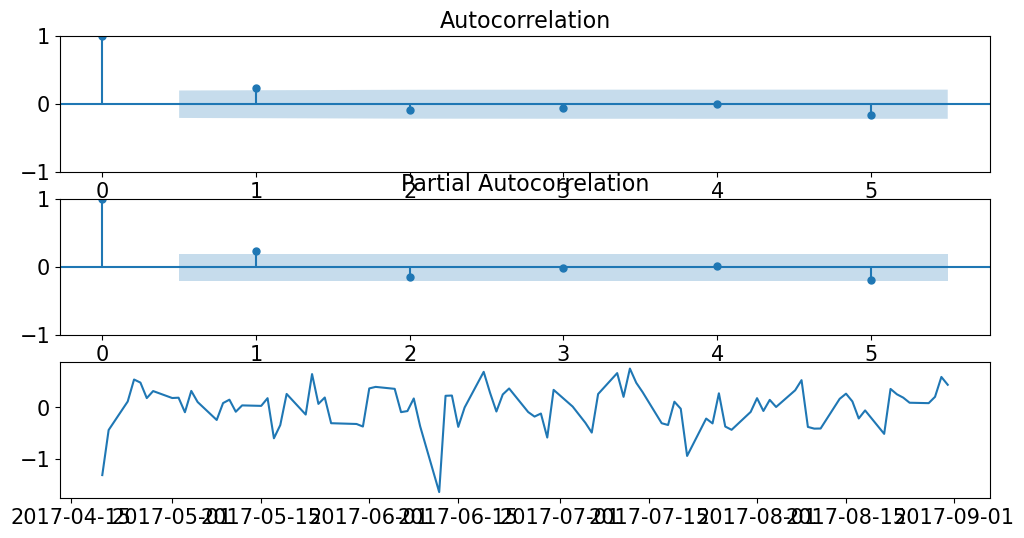

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationary data
data['station'] = data['NASDAQ.EBAY'] - data['NASDAQ.EBAY'].rolling(12).mean()

fig, ax = plt.subplots(3, figsize=(12,6))
x = (data.station.dropna() - data.station.dropna().shift(1)).dropna()
ax[0] = plot_acf(x, ax=ax[0], lags=5)
ax[1] = plot_pacf(x, ax=ax[1], lags=5)
ax[2].plot(x)

## Train Test Split

In [42]:
data.drop('NASDAQ.EBAY First Difference',axis=1,inplace=True)
data.drop('station',axis=1,inplace=True)

In [43]:
i=0.80
per=int(data.shape[0]*i)
per

84

In [44]:
train = data.iloc[:int(per+1)]
test = data.iloc[int(per+1):]

In [45]:
print(train.shape[0])
train.tail()

85


,NASDAQ.EBAY
DATE,
2017-07-27,36.389947
2017-07-28,35.952354
2017-07-31,35.799889
2017-08-01,35.881915
2017-08-02,35.714713


In [46]:
print(test.shape[0])
test

21


,NASDAQ.EBAY
DATE,
2017-08-03,35.780065
2017-08-04,35.674530
2017-08-07,35.896960
2017-08-08,36.425668
2017-08-09,36.016734
2017-08-10,35.548351
2017-08-11,35.002152
2017-08-14,35.058115
2017-08-15,35.267689


### pdq value iteration

In [47]:
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)

pdq_combination=list(itertools.product(p,d,q))

#### for loop over rmse

In [48]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

In [49]:
order1=[]
rmse=[]

for pdq in pdq_combination:
    try:
        model=ARIMA(train['NASDAQ.EBAY'],order=pdq).fit()
        pred=model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE']).sort_values('RMSE')
results.head()

,RMSE
"(0, 1, 1)",0.678514
"(0, 1, 4)",0.679504
"(3, 1, 0)",0.679713
"(3, 1, 1)",0.681108
"(1, 1, 1)",0.682508


In [50]:
mod = ARIMA(train['NASDAQ.EBAY'], order=(0,1,1))

results_Arima = mod.fit()

In [51]:
predicted_autoARIMA = results_Arima.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
predicted_autoARIMA=pd.DataFrame(predicted_autoARIMA).set_index(test.index.copy())
predicted_autoARIMA.head()

,predicted_mean
DATE,
2017-08-03,35.667663
2017-08-04,35.667663
2017-08-07,35.667663
2017-08-08,35.667663
2017-08-09,35.667663


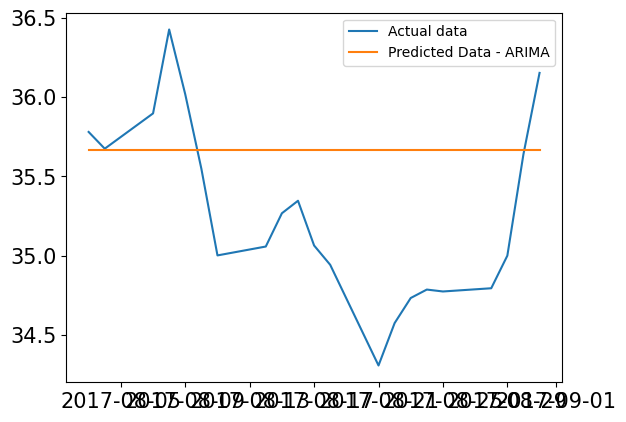

In [52]:
plt.plot(test,label='Actual data')
plt.plot(predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.legend()

## SARIMAX

### Predict P,Q

In [53]:
P=range(0,6)
D=range(1,2)
Q=range(0,6)

pdq_combination=list(itertools.product(P,D,Q))

In [54]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [55]:
order1=[]
rmse=[]

for pdq in pdq_combination:
    try:
        model=sm.tsa.statespace.SARIMAX(train,order=(0, 1, 1),seasonal_order=(pdq[0],pdq[1],pdq[2],12)).fit()
        pred=model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except Exception as e:
        raise e

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE']).sort_values('RMSE')
results.head(10)

,RMSE
"(0, 1, 0)",0.848057
"(1, 1, 0)",0.909509
"(0, 1, 1)",1.170412
"(5, 1, 4)",1.250565
"(5, 1, 5)",1.277279
"(4, 1, 5)",1.284034
"(4, 1, 4)",1.284461
"(3, 1, 3)",1.285930
"(2, 1, 4)",1.292150
"(3, 1, 5)",1.295280


In [56]:
model=sm.tsa.statespace.SARIMAX(data,order=(0, 1, 1),seasonal_order=(0,1,0,12)).fit()

In [57]:
predicted_SARIMA = model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
predicted_SARIMA=pd.DataFrame(predicted_SARIMA).set_index(test.index.copy())
predicted_SARIMA.head()

,predicted_mean
DATE,
2017-08-03,35.575107
2017-08-04,35.871204
2017-08-07,36.037692
2017-08-08,35.245068
2017-08-09,35.218831


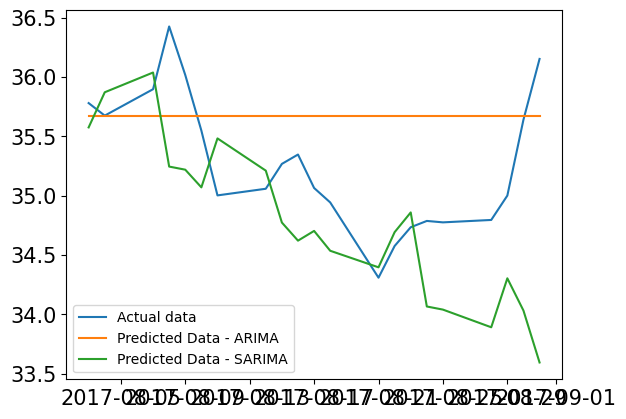

In [58]:
plt.plot(test,label='Actual data')
plt.plot(predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.plot(predicted_SARIMA,label='Predicted Data - SARIMA')
plt.legend()

## Future Forecast

In [59]:
months=10
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,months+1)]
future_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)
forecast=model.forecast(steps=months)
future_stocks = pd.DataFrame(forecast).set_index(future_data.index)
future_stocks.rename(columns = {'predicted_mean':'NASDAQ.EBAY'}, inplace = True)

In [60]:
data.tail()

,NASDAQ.EBAY
DATE,
2017-08-25,34.774916
2017-08-28,34.795236
2017-08-29,35.000597
2017-08-30,35.639739
2017-08-31,36.152124


In [71]:
df

,NASDAQ.EBAY
DATE,
2017-04-03 13:30:00,33.3975
2017-04-03 13:31:00,33.3950
2017-04-03 13:32:00,33.4100
2017-04-03 13:33:00,33.3350
2017-04-03 13:34:00,33.4000
...,...
2017-08-31 19:56:00,36.1350
2017-08-31 19:57:00,36.1300
2017-08-31 19:58:00,36.1300


In [72]:
future_data.head()

,NASDAQ.EBAY
2017-09-30 20:00:00,NaN
2017-10-31 20:00:00,NaN
2017-11-30 20:00:00,NaN
2017-12-31 20:00:00,NaN
2018-01-31 20:00:00,NaN


In [62]:
future_stocks.head()

,NASDAQ.EBAY
2017-09-30,36.276385
2017-10-31,35.994538
2017-11-30,35.872782
2017-12-31,35.238544
2018-01-31,35.505537


<AxesSubplot:>

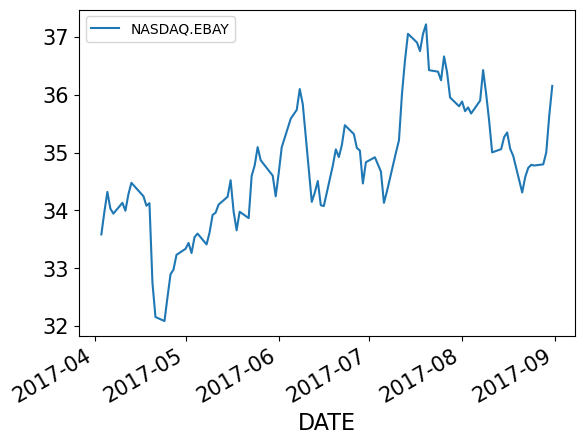

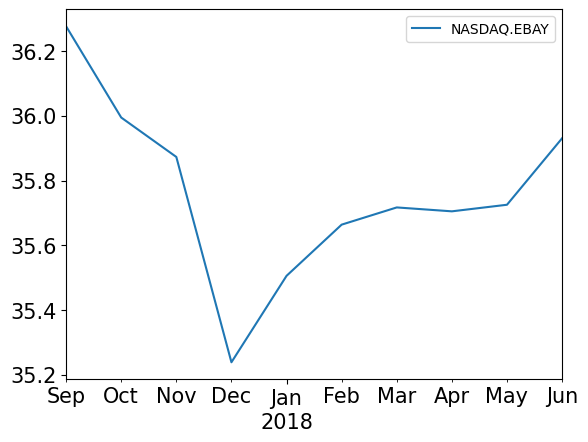

In [63]:
data.plot()
future_stocks.plot()

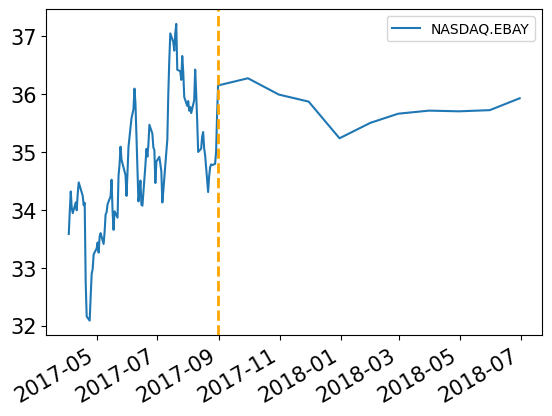

In [64]:
pd.concat([data,future_stocks]).plot()
plt.axvline('2017-08-31',color='orange',lw=2,ls='dashed')

In [65]:
future_stocks

,NASDAQ.EBAY
2017-09-30,36.276385
2017-10-31,35.994538
2017-11-30,35.872782
2017-12-31,35.238544
2018-01-31,35.505537
2018-02-28,35.663686
2018-03-31,35.716839
2018-04-30,35.704792
2018-05-31,35.725112
2018-06-30,35.930473


In [66]:
model.save('../ebay.pkl')

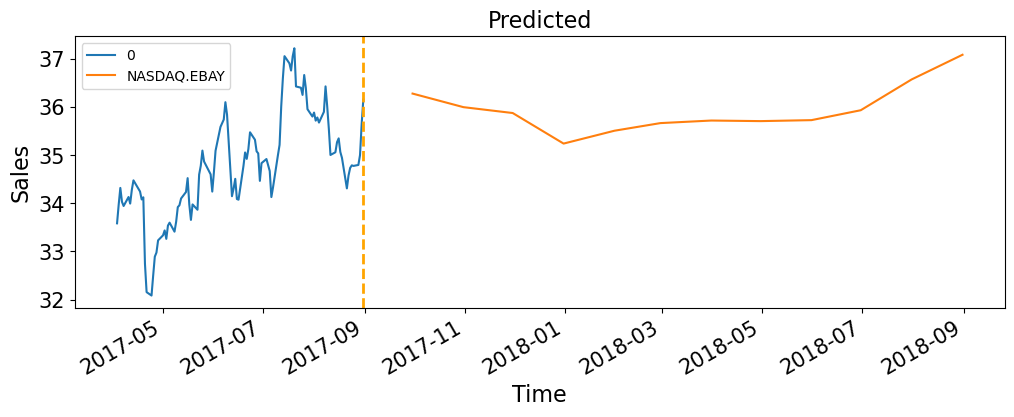

In [78]:
s_stock='NASDAQ.EBAY'
df=df.resample('B').mean().dropna()
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,13)]
future_data=pd.DataFrame(index=future_dates[1:],columns=[s_stock])
forecast=model.forecast(steps=12)
future_stocks = pd.DataFrame(forecast).set_index(future_data.index)
future_stocks.rename(columns = {'predicted_mean':s_stock}, inplace = True)

pd.concat([df[s_stock],future_stocks]).plot(figsize=(12,4))
plt.ylabel('Sales')
plt.title("Predicted")
plt.xlabel('Time')
plt.axvline('2017-08-31',color='orange',lw=2,ls='dashed')
plt.legend()

In [79]:
df

,NASDAQ.EBAY
DATE,
2017-04-03,33.583420
2017-04-04,33.971657
2017-04-05,34.318333
2017-04-06,34.029881
2017-04-07,33.943332
...,...
2017-08-25,34.774916
2017-08-28,34.795236
2017-08-29,35.000597


In [80]:
future_stocks

,NASDAQ.EBAY
2017-09-30,36.276385
2017-10-31,35.994538
2017-11-30,35.872782
2017-12-31,35.238544
2018-01-31,35.505537
2018-02-28,35.663686
2018-03-31,35.716839
2018-04-30,35.704792
2018-05-31,35.725112
2018-06-30,35.930473


In [82]:
pd.concat([df,future_stocks])

,NASDAQ.EBAY
2017-04-03,33.583420
2017-04-04,33.971657
2017-04-05,34.318333
2017-04-06,34.029881
2017-04-07,33.943332
...,...
2018-04-30,35.704792
2018-05-31,35.725112
2018-06-30,35.930473
2018-07-31,36.569614
